In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df=pd.read_csv("C:\\Users\\AFNAN AFSHEEN\\OneDrive\\Desktop\\ineuron\\project2\\train.csv")


In [189]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# EDA :Exploratory Data Analysis:

In [190]:
df.shape

(215, 15)

In [191]:
df.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

<AxesSubplot:>

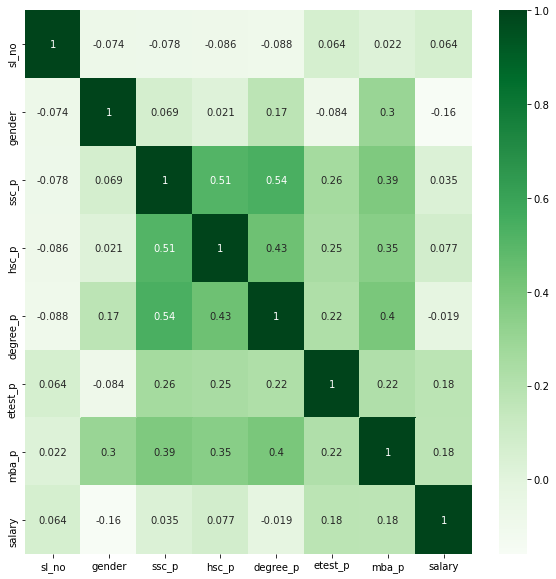

In [192]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [193]:
cat=df.select_dtypes("object")

In [194]:
cat

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...
210,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [195]:
df.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [196]:
df.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [197]:
df.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [198]:
df.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [199]:
df.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [200]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [201]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [202]:
df.drop(columns=["sl_no","ssc_b","hsc_b"],inplace=True)

In [203]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Handling Missing Values

In [204]:
df.isna().sum()

gender             0
ssc_p              0
hsc_p              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [205]:
# Replacing the missing values with mean
mean=df.salary.mean()
df.salary.fillna(mean,inplace=True)

In [206]:
df.salary.isna().sum()

0

# Creating Independent and Dependent variables

In [207]:
X=df.drop(columns=["status"])
y=df.status

# Preparing Data / Encoding

In [208]:
# Column Transformer is used to convert various categorical data to numerical data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [209]:
# Index of Columns to be encoded and encoding technique is given to columntransformer as given below
pre=ColumnTransformer([('one',OneHotEncoder(),[3,5,6,8])],remainder='passthrough')
X=pre.fit_transform(X)

In [210]:
#Splitting training and testing data for Model

In [211]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [212]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((172, 17), (43, 17), (172,), (43,))

In [213]:
# Using Logistic Regression for model training and prediction

In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
lr=LogisticRegression()

In [216]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [217]:
y_pred=lr.predict(xtest)
xtest.shape

(43, 17)

# Performance Metric to check the performance of the model

In [218]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [219]:
confusion_matrix(ytest,y_pred)

array([[ 8,  4],
       [ 4, 27]], dtype=int64)

In [220]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

  Not Placed       0.67      0.67      0.67        12
      Placed       0.87      0.87      0.87        31

    accuracy                           0.81        43
   macro avg       0.77      0.77      0.77        43
weighted avg       0.81      0.81      0.81        43



In [221]:
accuracy_score(ytest,y_pred)

0.813953488372093

In [222]:
# Using joblib Dumping our model for further Deployment Purpose

In [223]:
import joblib

In [224]:
joblib.dump(lr,r'C:\\Users\\AFNAN AFSHEEN\\OneDrive\\Desktop\\ineuron\\project2\\lr.pkl')
joblib.dump(pre,r'C:\\Users\\AFNAN AFSHEEN\\OneDrive\\Desktop\\ineuron\\project2\\pre.pkl')

['C:\\\\Users\\\\AFNAN AFSHEEN\\\\OneDrive\\\\Desktop\\\\ineuron\\\\project2\\\\pre.pkl']

In [225]:
import requests
import json

In [226]:
data={'gender':1,'ssc_p':70,'hsc_p':30,'hsc_s':'Commerce','degree_p':60,'degree_t':'Comm&Mgmt','workex':'No','etest_p':54,
'specialisation':'Mkt&Fin','mba_p':30,'salary':300000}
data=json.dumps(data)


In [227]:
url='http://127.0.0.1:5000/'
r=requests.post(url,data)


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000244CF74B250>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
r.content